 # SPAM FILTERING PROJECT
 

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import string

In [8]:
msg = pd.read_csv('SMSSpamCollection', sep='\t')

In [9]:
msg.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [10]:
msg = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','message'])

In [11]:
msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
msg['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [13]:
msg['length'] = msg['message'].apply(len)

In [14]:
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Text(0.5, 0, 'length')

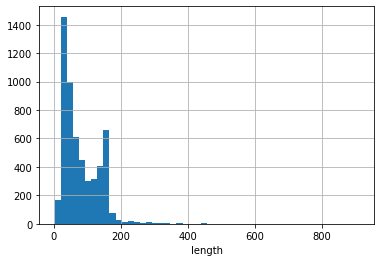

In [15]:
msg['length'].hist(bins=50)
plt.xlabel('length')

In [16]:
msg.length.mean()

# average length is around 80 

80.48994974874371

Text(0.5, 1.0, ' ham')

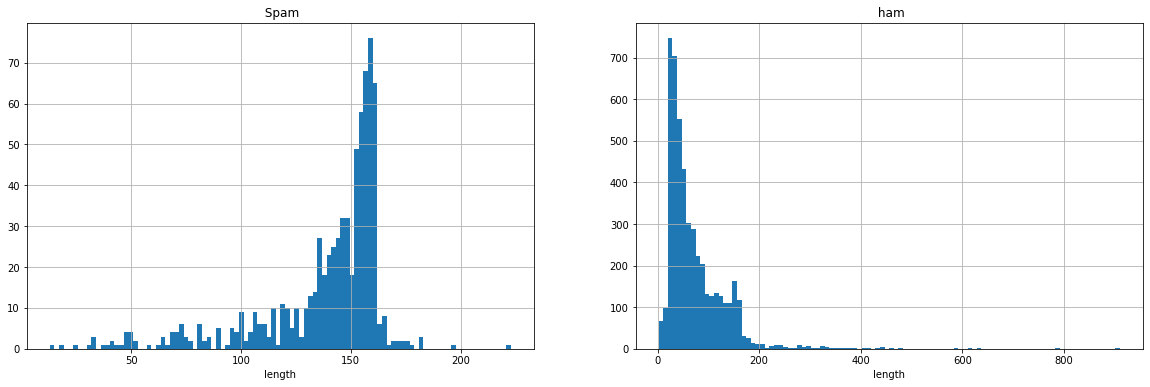

In [17]:
fig, axes = plt.subplots(1,2, figsize=(20,6))

msg['length'][msg['label']=='spam'].hist(bins=100, ax=axes[0])
axes[0].set_xlabel('length')
axes[0].set_title(' Spam')

msg['length'][msg['label']=='ham'].hist(bins=100, ax=axes[1])
axes[1].set_xlabel('length')
axes[1].set_title(' ham')


In [18]:
# average length of Spam messages are around 160
# wheras average length of ham messages are around 70-80.

## Text Preprocessing

In [19]:
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
msg['message1'] = msg['message'].str.replace('[^a-zA-Z]', ' ')         # symbols, punctuations, numbers removed

In [21]:
# msg.head()

In [22]:
msg['message1'] = msg['message1'].str.lower()

# msg.head()


In [23]:
msg['message1'] = msg['message1'].str.split()

msg.head()

,label,message,length,message1
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, i, don, t, think, he, goes, to, usf, he,..."


In [24]:
msg['message1'] = msg['message1'].apply(lambda x: [w.strip() for w in x])

# msg.head()

In [25]:
from nltk.corpus import stopwords
Stop = stopwords.words('english')

In [26]:
msg['message1'] = msg['message1'].apply(lambda x: [w for w in x if w not in Stop ])                # stopwords removed
msg.head()

,label,message,length,message1
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, think, goes, usf, lives, around, though]"


In [27]:
# stemming 

from nltk.stem import PorterStemmer

stemming = PorterStemmer()


In [28]:
msg['message1'] = msg['message1'].apply(lambda  x: [stemming.stem(w) for w in x])

# msg.head()

In [29]:
msg['message1'] = msg['message1'].apply(lambda x: ' '.join(x))

msg.head()

,label,message,length,message1
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [49]:
# msg['cloud_purpose'] = msg['message1'].str.split()

all_words = ""

for sent in msg['message1']:
#     for word in sent:
    all_words += " "+sent
        
len(all_words)

263103

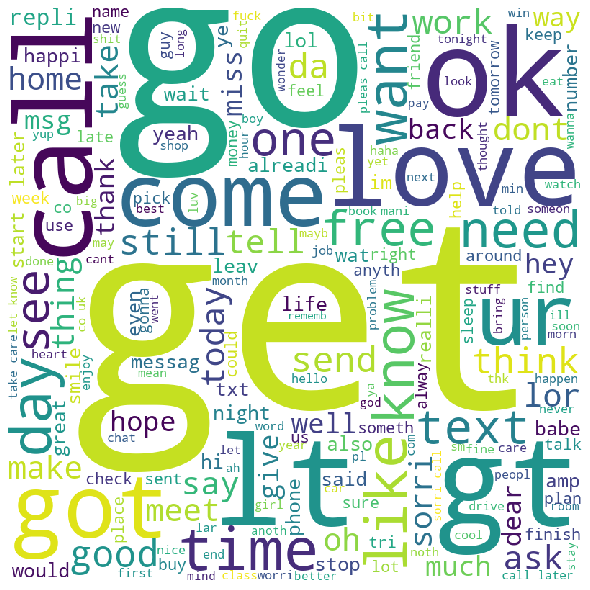

In [51]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = Stop, 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [52]:
mess = msg[['message1','label']]

In [53]:
mess.head()

,message1,label
0,go jurong point crazi avail bugi n great world...,ham
1,ok lar joke wif u oni,ham
2,free entri wkli comp win fa cup final tkt st m...,spam
3,u dun say earli hor u c alreadi say,ham
4,nah think goe usf live around though,ham


In [54]:
mess.shape

(5572, 2)

In [55]:
mess.drop_duplicates(inplace=True)

In [56]:
mess.dropna(inplace=True)

In [57]:
mess.shape

(5057, 2)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit(mess['message1'])

messages = tfidf.transform(mess['message1'])

In [60]:
messages

<5057x6296 sparse matrix of type '<class 'numpy.float64'>'
	with 40247 stored elements in Compressed Sparse Row format>

In [61]:
len(tfidf.vocabulary_)

6296

In [62]:
mess['label'].value_counts()

ham     4477
spam     580
Name: label, dtype: int64

In [63]:
from imblearn.combine import SMOTETomek
x_res,y_res = SMOTETomek().fit_sample(messages,mess['label'])

In [64]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=44)

In [65]:
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

spam_detector =  LogisticRegression().fit(x_train,y_train)
# spam_detector = SVC().fit(x_train,y_train)
# spam_detector = KNeighborsClassifier().fit(x_train,y_train)

In [66]:
pred = spam_detector.predict(x_test)

In [68]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print('report \n', classification_report(y_test,pred))

print('\n confusion matrix \n', confusion_matrix(y_test, pred))

print('\n accuracy : ',accuracy_score(y_test,pred))

report 
               precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1338
        spam       0.99      0.98      0.98      1349

    accuracy                           0.98      2687
   macro avg       0.98      0.98      0.98      2687
weighted avg       0.98      0.98      0.98      2687


 confusion matrix 
 [[1325   13]
 [  29 1320]]

 accuracy :  0.9843691849646445


In [69]:
spam_detector.predict(tfidf.transform(['tonight i am free lets go for a movie ']))

array(['ham'], dtype=object)

In [70]:
spam_detector.predict(tfidf.transform(['tonight we are  giving you a free movie  ticket worth 10000 join us free entry']))

array(['spam'], dtype=object)

In [85]:
def text_process(msg):
    no_punc = [c for c in msg if c not in string.punctuation+'1234567890']
    no_punc = ''.join(no_punc)
    spl = no_punc.split()
    no_stop = [word for word in spl if word.lower() not in Stop]
    stemm   = [stemming.stem(word) for word in no_stop ]
    word = ' '.join(stemm)
    tf = tfidf.transform([word])
    predict = spam_detector.predict(tf)
    return predict

text_process('Hi Ankur,78,973 developers free have already registered for hiring challenges this week.Participate in the upcoming challenges to secure your dream free developer jobs in the coolest companies.')

array(['ham'], dtype=object)